![](https://github.com/VascoCapao/images/blob/main/dimension_redution.png?raw=true)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## Multidimensionality Visualization

### -> PCA

In [4]:
# Load the data with the all variables
customer_info_final = pd.read_csv('custumer_info_final_with_%.csv')

In [6]:
# Drop the first column
customer_info_final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
customer_info_final.head()

,customer_age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,percentage_lifetime_spend_fish,percentage_lifetime_spend_vegetables,percentage_lifetime_spend_nonalcohol_drinks,percentage_lifetime_spend_alcohol_drinks,percentage_lifetime_spend_meat,percentage_lifetime_spend_hygiene,percentage_lifetime_spend_videogames,percentage_lifetime_spend_petfood,avg_spend_per_store,loyalty_years
0,60,1.0,1.0,1.0,2.0,18306.0,7106.0,17.0,484.0,604.0,...,0.095753,0.011426,0.014259,0.022262,0.052551,0.051323,0.093156,0.059350,21179.500000,14.0
1,55,0.0,1.0,1.0,3.0,3097.0,4073.0,10.0,301.0,852.0,...,0.132786,0.017030,0.048204,0.097935,0.025233,0.073890,0.085092,0.114173,5891.666667,15.0
2,83,0.0,0.0,0.0,1.0,10825.0,207.0,17.0,153.0,252.0,...,0.009367,0.009491,0.015632,0.003722,0.017679,0.003288,0.000000,0.256498,16121.000000,17.0
3,23,0.0,0.0,0.0,1.0,697.0,570.0,14.8,8.0,33.0,...,0.032818,0.001526,0.006297,0.540546,0.010303,0.112002,0.042549,0.012211,5241.000000,0.0
4,65,1.0,1.0,0.0,2.0,13419.0,12029.0,18.0,439.8,745.0,...,0.104672,0.010350,0.017532,0.031133,0.034334,0.033063,0.101989,0.068079,21247.400000,19.0


In [8]:
# Standardize the data
customer_info_scaled = StandardScaler().fit_transform(customer_info_final)

c:\Users\patri\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\patri\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [11]:
# Initialize PCA 
pca = PCA(n_components=32).fit(customer_info_scaled)

# Fit the PCA model to the scaled customer data
components = pca.transform(customer_info_scaled)


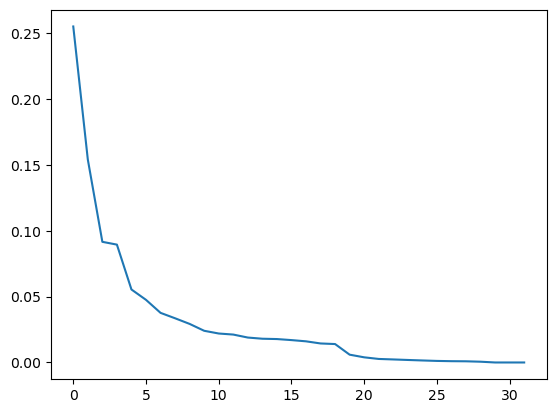

In [12]:
# Plot the explained variance ratio for each principal component
plt.plot(pca.explained_variance_ratio_)

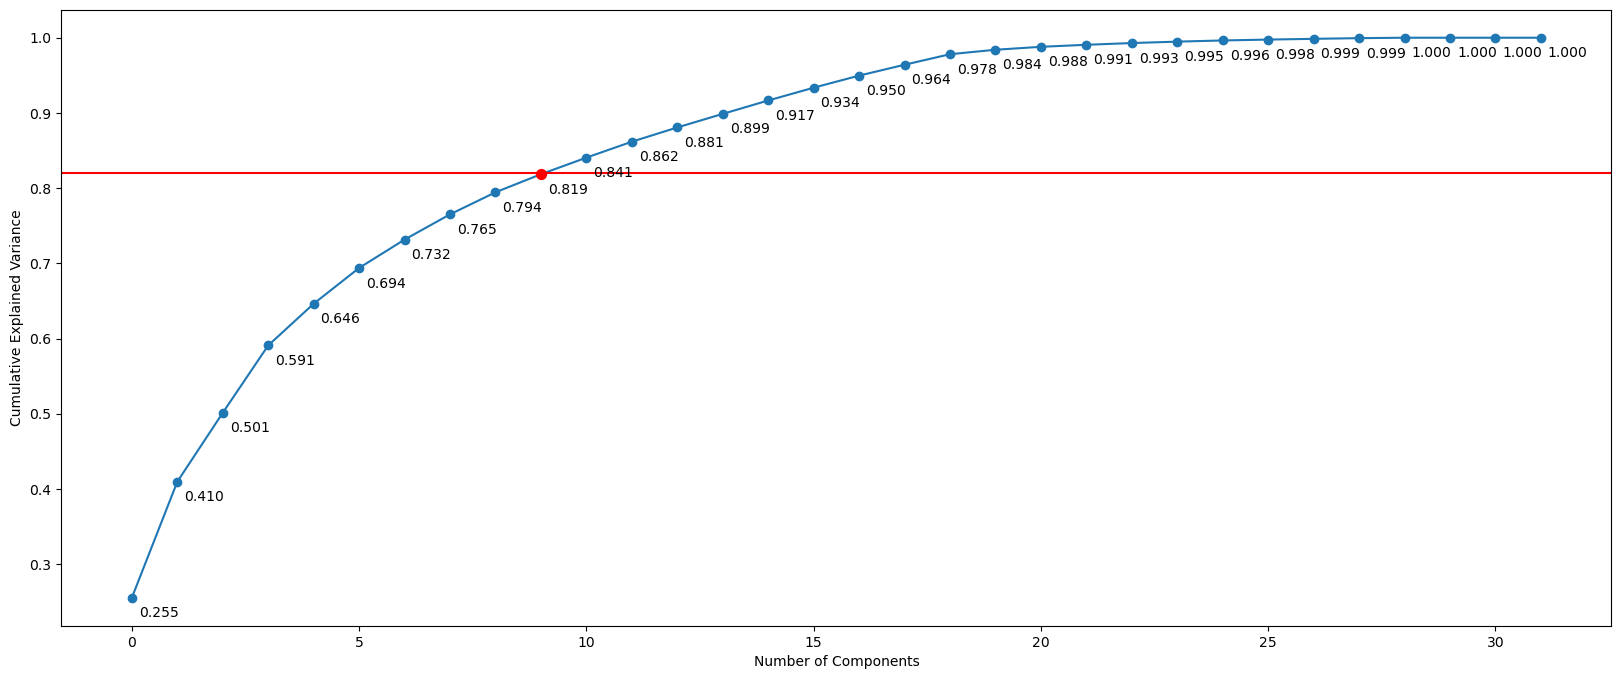

In [14]:
# To visualize the explained variance as a % of cumulative variance
plt.figure(figsize=(20, 8))

# Label the x-axis
plt.xlabel('Number of Components')

# Label the y-axis
plt.ylabel('Cumulative Explained Variance')

# Plot the cumulative explained variance ratio
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')

# Highlight the 9th principal component with a red scatter point
plt.scatter(9, pca.explained_variance_ratio_.cumsum()[9], color='red', s=50, zorder=10)

# Add a horizontal line at 85% cumulative explained variance
plt.axhline(y=0.82, color='r', linestyle='-')

# Annotate each point with its cumulative explained variance value
for i, value in enumerate(pca.explained_variance_ratio_.cumsum()):
    plt.annotate(f'{value:.3f}', (i, value), xytext=(5, -6), textcoords='offset points', ha='left', va='top')

# Display the plot
plt.show()


In [16]:
# To see the influence of each variable in the principal components
pc_variables = pd.DataFrame(
    pca.components_.T,
    columns = ['PC'+str(i) for i in range(0,32)],
    index=customer_info_final.columns)

pc_variables.sort_values('PC0')

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
percentage_lifetime_spend_vegetables,-0.199936,0.023457,-0.399458,0.023297,-0.193053,-0.018745,-0.034770,-0.114824,-0.078058,0.208421,...,0.023450,0.110526,-0.036239,0.028596,0.663170,-0.171761,0.129654,2.142577e-01,-2.016547e-02,-1.402478e-01
percentage_lifetime_spend_nonalcohol_drinks,-0.157891,-0.171767,0.042375,0.065477,-0.112107,0.425314,-0.206486,-0.324550,-0.302381,-0.146661,...,0.316412,-0.157051,-0.046309,-0.117996,-0.137870,-0.021583,-0.031526,1.039240e-01,-9.781107e-03,-6.802613e-02
percentage_of_products_bought_promotion,-0.145640,-0.120158,0.179084,-0.120826,0.136467,-0.267112,-0.112858,-0.135894,-0.047232,-0.227418,...,0.043614,-0.019771,0.006872,0.009967,0.004522,-0.005451,-0.002891,1.092802e-16,-1.230935e-17,-9.548674e-17
percentage_lifetime_spend_groceries,-0.109779,0.259105,-0.182827,-0.099065,0.107194,-0.190509,0.039997,-0.266243,0.235387,-0.459097,...,-0.113686,0.028886,-0.026193,-0.135043,-0.145340,-0.210282,0.009884,4.216667e-01,-3.968637e-02,-2.760127e-01
lifetime_spend_vegetables,-0.067690,0.068349,-0.496121,0.004225,-0.153632,0.018203,0.015416,-0.129678,-0.071688,0.207282,...,0.019337,-0.070128,-0.000171,-0.074082,-0.607776,0.148523,-0.108541,-1.860516e-03,-2.526730e-02,7.907226e-04
distinct_stores_visited,-0.053075,-0.203068,0.224338,-0.084907,-0.054203,-0.301336,-0.178866,-0.234552,-0.054033,-0.146497,...,-0.134208,-0.167108,0.009905,-0.008235,0.012525,0.002672,-0.008909,-6.817692e-17,-3.737655e-17,5.478061e-17
percentage_lifetime_spend_petfood,-0.052467,0.305918,0.327842,-0.076846,0.057647,0.129525,0.083984,0.078697,-0.035413,0.305201,...,-0.097448,-0.003373,-0.021315,0.126339,-0.033913,0.396301,-0.088842,4.494138e-01,-4.229786e-02,-2.941753e-01
percentage_lifetime_spend_hygiene,-0.037866,-0.292875,-0.074646,-0.057869,-0.215702,-0.010367,0.325679,-0.102915,0.175401,0.207683,...,-0.053279,0.231125,0.358632,0.044291,-0.092842,-0.025545,-0.054450,1.591053e-01,-1.497465e-02,-1.041464e-01
percentage_lifetime_spend_alcohol_drinks,-0.025972,-0.214064,0.165213,0.270532,-0.249912,0.199831,-0.162703,0.156500,0.411358,-0.087159,...,-0.155247,-0.078567,-0.092595,-0.035209,-0.046357,-0.051358,-0.003221,2.114503e-01,-1.990125e-02,-1.384102e-01
year_first_transaction,-0.019297,-0.021790,0.028827,0.507629,0.245684,-0.059865,0.140613,-0.219792,0.016621,0.115758,...,0.001751,0.003504,-0.005944,-0.001015,0.004947,0.000699,-0.001134,-3.865727e-01,9.938450e-03,-5.919990e-01


In [18]:
# Create a DataFrame from 'components', with the same index as 'customer_info_final' and columns named 'PC0' to 'PC35'.
customer_info_pca = pd.DataFrame(components, index = customer_info_final.index, columns = ['PC' + str(i) for i in range(0,32)]).iloc[:,:9]

In [19]:
customer_info_pca.to_csv('customer_info_pca.csv')